In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
test_data_arr = np.genfromtxt('lab_1_test.csv', delimiter=',', skip_header=1, usecols=(1,2))
train_data_arr = np.genfromtxt('lab_1_train.csv', delimiter=',', skip_header=1, usecols=(1,2))

In [7]:
%matplotlib inline

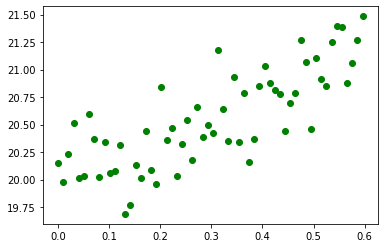

In [9]:
train_arr_T = train_data_arr.T
train_arr_x = train_arr_T[0]
train_arr_y = train_arr_T[1]
plt.plot(train_arr_x, train_arr_y, 'go')
plt.show()

In [15]:
features = train_arr_x.reshape(-1, 1)
targets = train_arr_y
weights = np.random.rand(2)
print(weights)

[0.20283968 0.58376708]


In [16]:
def linear_regression(features, weights):
    return features.dot(weights[1:]) + weights[0]

In [17]:
y_predicted = linear_regression(features, weights)

In [19]:
def lost_function(targets, y_predicted):
    return np.sum(np.square(targets-y_predicted))/2

In [20]:
lost = lost_function(targets, y_predicted)
print("Total lost = ", lost)

Total lost =  12212.200358512964


In [21]:
def gradient(features, weights, targets):
    targets_predicted = linear_regression(features, weights)
    loss = targets - targets_predicted
    m = len(features)
    return np.array([-np.sum(loss)/m, -np.sum(features.T.dot(loss))/m])

In [22]:
gradient(features, weights, targets)

array([-20.17277272,  -6.05376715])

In [23]:
def calc_linear_regression(features, weights, targets, learning_rate = 0.1, epochs = 5000, tolerance = 0.00001):
    MSE_list = []
    weights_list = []
    total_MSE_new = 0
    for i in range (epochs):
        grad_weights = gradient(features, weights, targets)
        if np.sum(np.abs(grad_weights*learning_rate)) < tolerance: 
            break
        weights -= grad_weights*learning_rate
        new_predicted = linear_regression(features, weights)
        total_MSE_new = lost_function(targets, new_predicted)
        MSE_list.append(total_MSE_new)
        weights_list.append(weights.copy())
        
    return weights, total_MSE_new, MSE_list, np.array(weights_list)

In [24]:
weights, total_MSE_new, MSE_list, weights_list = calc_linear_regression(features, weights, targets)

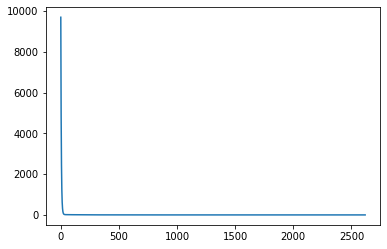

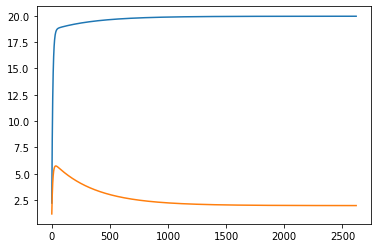

2619
[19.95908888  1.98151306]


In [25]:
plt.plot(MSE_list, label = "train_MSE")
plt.show()
plt.plot(weights_list)
plt.show()
print(len(MSE_list))
print(weights)

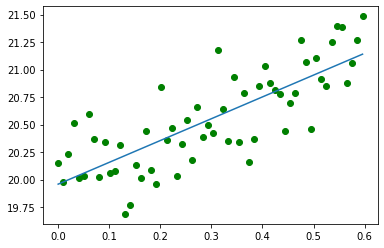

In [26]:
pred = linear_regression(features, weights)
plt.plot(train_arr_x, train_arr_y, "go", train_arr_x, pred)
plt.show()

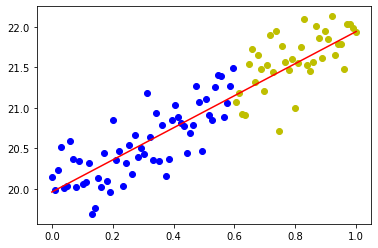

In [29]:
test_arr_T = test_data_arr.T
test_arr_x = test_arr_T[0]
test_arr_y = test_arr_T[1]
test_train_f = np.concatenate((train_arr_x, test_arr_x))
test_train_p = linear_regression(test_train_f.reshape(-1, 1), weights)
plt.plot(train_arr_x, train_arr_y, "bo", test_arr_x, test_arr_y, "yo", test_train_f.T, test_train_p, "r")
plt.show()